# Exploratory analysis for first collected data

##### Importing libraries to be used and getting current file path

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import zscore
import statistics

file_path = os.getcwd()

##### Defining function to get parent folder (get data)

In [19]:
def get_parent(path, number_of_folders):
    new_path = path
    for _ in range(0, number_of_folders):
        new_path = os.path.dirname(new_path)
    return(new_path)

##### Getting data path and DataFrame

In [20]:
data_path = os.path.join(get_parent(file_path, 1), '01_data\\02_treated\\02_datalake\\results.csv')
df = pd.read_csv(data_path)

##### Getting rid of dirty data

In [21]:
df.pos = pd.to_numeric(df.loc[:,'pos'], errors='coerce')
df.age = pd.to_numeric(df.loc[:, 'age'], errors='coerce')
df = df.loc[df.pos.notna()]

In [22]:
df = df.loc[df.time.notna()]

##### Creating new features of time

In [23]:
df['time_s'] = df.time.apply(lambda t: int(t.split(':')[0])*3600 + int(t.split(':')[1])*60 + int(t.split(':')[2]))
df['time_m'] = df.time_s / 60
df['time_h'] = df.time_m / 60

##### Creating new features of distance

In [24]:
df['dist_num'] = df.distance.str.replace('KM', '')
df.dist_num = pd.to_numeric(df.loc[:, 'dist_num'])

In [25]:
df.head(2)

,Unnamed: 0,pos,num,athlete,gender,age,group,ag,c,team,time,distance,time_s,time_m,time_h,dist_num
0,0,1.0,10092,FIDELANDE XAVIER OLIVEIRA,F,35.0,F3539,-,NaN,NaN,00:39:30,10KM,2370,39.500000,0.658333,10
1,1,2.0,9299,ROSELANIA VALENTIM,F,33.0,F3034,-,NaN,MULHERES EM MOVIMENTO BH INDIVIDUAL,00:41:14,10KM,2474,41.233333,0.687222,10


##### Checking distribuition of total time

1.0550824406637258
0.9567823712948517
0.7676028836284322
0.6961735550091716


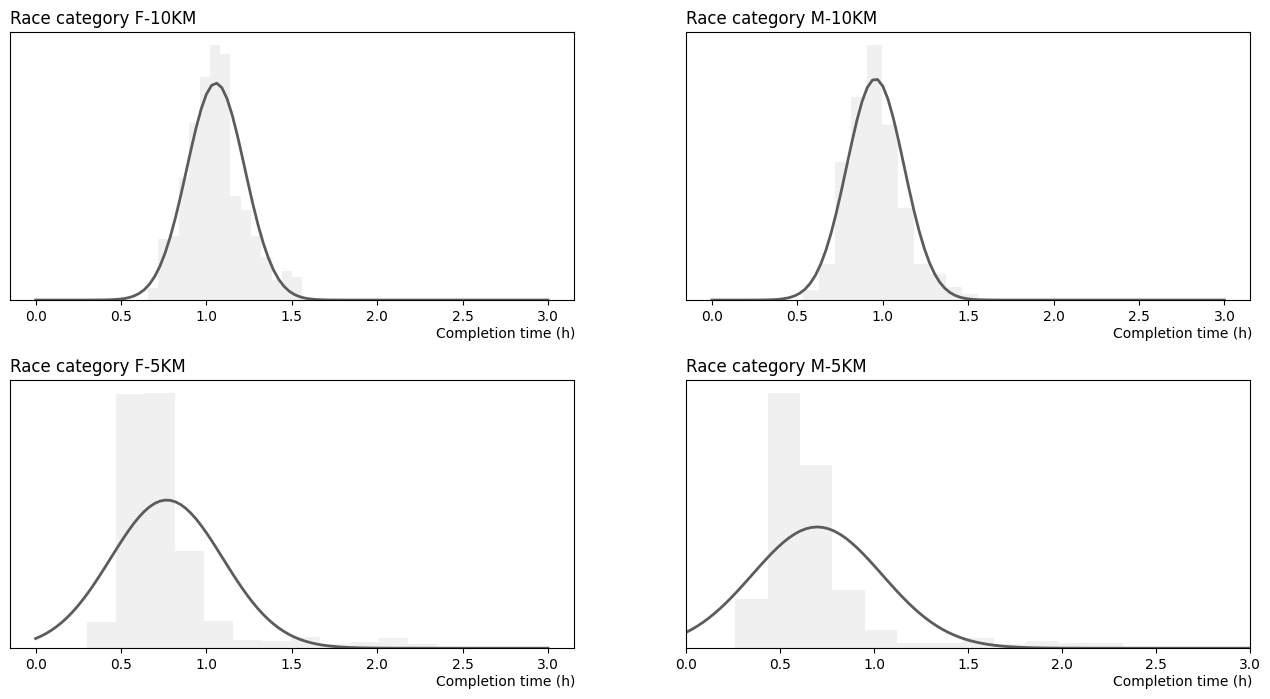

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

# Data slicers
genders = ['F', 'M', 'F', 'M']
dist_nums = [10, 10, 5, 5]

for i in range(0,4):
    
    
    # New DataFrame sliced by race
    df_br = df.loc[(df.gender == genders[i]) & (df.dist_num == dist_nums[i])]
    values = df_br.time_h.values

    # Plotting histogram
    ax.flat[i].hist(values, bins=15, color='#F0F0F0', density=True)
    
    mean, std = norm.fit(values)
    xmin = 0
    xmax = 3 #values.max()
    plt.xlim(xmin, xmax)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    
    # Plotting normal distribuition
    ax.flat[i].plot(x, p, color='#5C5C5C', linewidth=2)
    
    ax.flat[i].set_title(f'Race category {genders[i]}-{dist_nums[i]}KM', loc='left')
    
    ax.flat[i].tick_params(axis='y', which='both', left=False, labelleft=False)
    
    ax.flat[i].set_xlabel('Completion time (h)')
    
    ax.flat[i].xaxis.set_label_coords(0.88, -0.1)
    
    plt.subplots_adjust(hspace = 0.3)
    
    print(mean)

plt.show()

##### Adjusting normal distribuitions by taking out the outliers

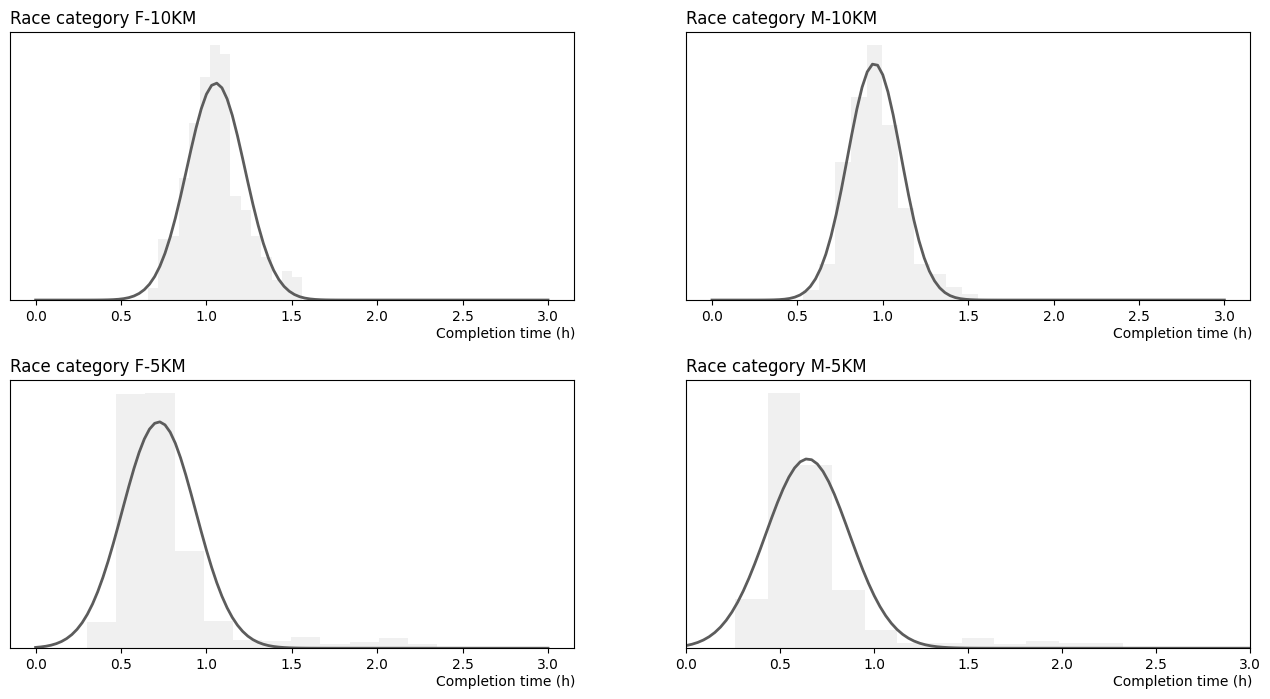

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

# Data slicers
genders = ['F', 'M', 'F', 'M']
dist_nums = [10, 10, 5, 5]

for i in range(0,4):
    
    
    # New DataFrame sliced by race
    df_br = df.loc[(df.gender == genders[i]) & (df.dist_num == dist_nums[i])]
    values = df_br.time_h.values

    # Plotting histogram
    ax.flat[i].hist(values, bins=15, color='#F0F0F0', density=True)
    
    # Removing outliers
    z_scores = np.abs(zscore(df_br['time_h']))
    threshold = 3
    df_br = df_br[z_scores <= threshold]
    values = df_br.time_h.values

    # Normal distribuition params
    mean, std = norm.fit(values)
    xmin = 0
    xmax = 3 #values.max()
    plt.xlim(xmin, xmax)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)

    # Plotting normal distribuition
    ax.flat[i].plot(x, p, color='#5C5C5C', linewidth=2)
    
    ax.flat[i].set_title(f'Race category {genders[i]}-{dist_nums[i]}KM', loc='left')
    
    ax.flat[i].tick_params(axis='y', which='both', left=False, labelleft=False)
    
    ax.flat[i].set_xlabel('Completion time (h)')
    
    ax.flat[i].xaxis.set_label_coords(0.88, -0.1)
    
    plt.subplots_adjust(hspace = 0.3)

plt.show()

##### Creating table of normal distribuition

In [28]:
# Data slicers
nums = df.num.values

results = {
    'x' : [],
    'p' : [],
    'p_filtered' : [],
    'num' :[]
}

for num in nums:
    
    gender = df.loc[df.num == num].gender.values[0]
    dist_num = df.loc[df.num == num].dist_num.values[0]
    time_h = df.loc[df.num == num].time_h.values[0]
    
    # New DataFrame sliced by race category
    df_br = df.loc[(df.gender == gender) & (df.dist_num == dist_num)]
    z_scores = np.abs(zscore(df_br['time_h']))
    threshold = 3
    df_br = df_br[z_scores <= threshold]
    values = df_br.time_h.values
    
    mean, std = norm.fit(values)
    xmin = 0
    xmax = 3 #values.max()
    x = np.linspace(xmin, xmax, 500)
    p = norm.pdf(x, mean, std)
    
    for i, xs in enumerate(x):
        # Storing values in a dictionary
        results['x'].append(x[i])
        results['p'].append(p[i])
        results['p_filtered'].append(p[i] if xs <= time_h else 0)
        results['num'].append(num)

# Creating DataFrame
#df_nd = pd.DataFrame(results)
#results


In [ ]:
df_nd = pd.DataFrame(results)

In [ ]:
results_path = os.path.join(get_parent(file_path, 1), '01_data\\02_treated\\04_datawarehouse')
df.to_csv(results_path + '\\athletes.csv', sep=';', decimal=',', index=False)
df_nd.to_csv(results_path + '\\normal_dist.csv', sep=';', decimal=',', index=False)